# Champaign County Data

This notebook plots the data for Champaign County that can be found, daily, here:
https://www.c-uphd.org/champaign-urbana-illinois-coronavirus-information.html

The actual data is a personal file that I have been collecting since 4/14/2020 every time
the page is updated. I'll soon be uploading it to GitHub.

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
file = '/home/babreu/Science/covid19/repo/champaign_county/cuc.csv'
df = pd.read_csv(file,parse_dates=['date'])

In [3]:
df.sample(5)

,date,confirmed,deaths,recovered,curr_hospitalized,tests
7,2020-04-21,96,4,79,6,1983
21,2020-05-05,208,6,113,5,4237
31,2020-05-15,356,7,179,3,7682
14,2020-04-28,114,6,86,6,2624
34,2020-05-18,412,7,217,4,8609


In [4]:
df['active'] = df['confirmed'] - df['recovered'] - df['deaths']

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import datetime

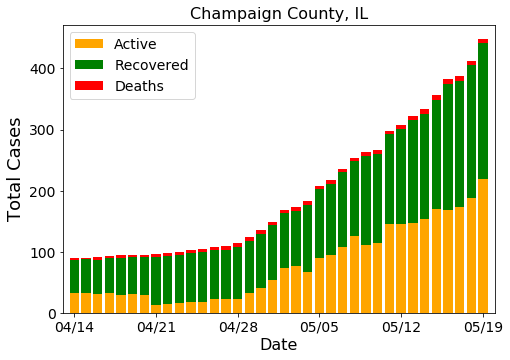

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['date'],df['active'],color=['orange'])
ax.bar(df['date'],df['recovered'],bottom=df['active'],color=['green'])
ax.bar(df['date'],df['deaths'],color=['red'],bottom=(df['active']+df['recovered']))

ax.set_ylabel('Cases')
ax.set_title('Champaign County, IL',fontsize=16)
ax.legend(labels=['Active','Recovered','Deaths'],fontsize=14)
date_form = DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Total Cases',fontsize=18)
ax.set_xlim(datetime.date(2020,4,13), datetime.date.today() + datetime.timedelta(days=1))

plt.tick_params(labelsize=14)
plt.show()

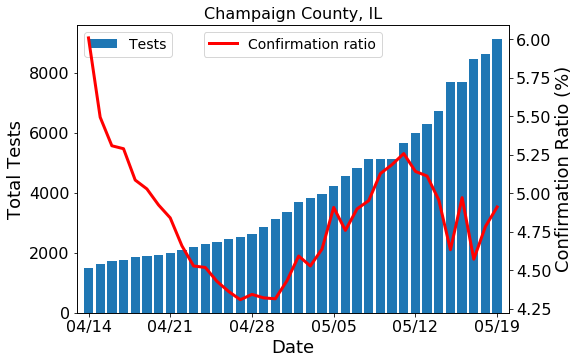

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['date'],df['tests'])

ax.set_title('Champaign County, IL',fontsize=16)
date_form = DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlabel('Date',fontsize=18)
ax.set_ylabel('Total Tests',fontsize=18)
ax.set_xlim(datetime.date(2020,4,13), datetime.date.today() + datetime.timedelta(days=1))
plt.tick_params(labelsize=16)
ax.legend(labels=['Tests'],fontsize=14, loc='upper left')

df['conf/tests'] = df['confirmed'] / df['tests']
ax2 = ax.twinx()
ax2.plot(df['date'],100*df['conf/tests'], color='red', lw=3)
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax2.set_ylabel('Confirmation Ratio (%)',fontsize=18)
plt.tick_params(labelsize=16)
ax2.legend(labels=['Confirmation ratio'],fontsize=14,loc='upper center')